# Lesson 1 : Implémentation numérique de la méthode des éléments finis

## Sommaire
1. [Example](##Example)
2. [Example2](#example2)
3. [Third Example](#third-example)
4. [Fourth Example](#fourth-example)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

E = 2.1E9 # Module d'Young (en Pa)
h = 0.15 # hauteur (en m)
b = 0.15 # base (en m)
A = 0.15 * 0.15 # Section (en m2)
I = b * h ** 3 / 12 # Inertie (en m4)

nodes = []
bars = []

cas = 3
if cas == 3 :
    p = 6
    h = 2.5
    nodes = [[0,0], #0
             [p/2,0], #1
             [p,0], #2
             [p/2,h]] #3
    bars = [[0,1],
            [1,2],
            [2,3],
            [3,1],
            [3,0]]
    
    nodes = np.array(nodes).astype(float)
    bars = np.array(bars)
    
    #Apply force
    P = np.zeros_like(nodes)
    P[3,0] = 10
    P[3,1] = 10

    # support displacement
    Ur = [0, 0, 0, 0]

    DOFCON = np.ones_like(nodes).astype(int)
    DOFCON[0,:] = 0
    DOFCON[2,:] = 0
    
if cas == 1:
    a = 1
    ### Nodes
    nodes.append([0,0])
    nodes.append([a,0])
    nodes.append([a/2,np.sqrt(3)/2*a])
    ### Bars
    bars.append([0,1])
    bars.append([1,2])
    bars.append([2,0])

    nodes = np.array(nodes).astype(float)
    bars = np.array(bars)

    #Apply force
    P = np.zeros_like(nodes)
    P[2,0] = 10
    P[2,1] = 10

    # support displacement
    Ur = [0,0, 0, 0]

    DOFCON = np.ones_like(nodes).astype(int)
    DOFCON[0,:] = 0
    DOFCON[1,:] = 0
elif cas == 2:
    nodes.append([0,120])
    nodes.append([120,120])
    nodes.append([240,120])
    nodes.append([360,120])
    nodes.append([0,0])
    nodes.append([120,0])
    nodes.append([240,0])
    nodes.append([360,0])
    
    bars.append([0,1])
    bars.append([1,2])
    bars.append([2,3])
    bars.append([4,5])
    bars.append([5,6])
    bars.append([6,7])
    
    bars.append([5,1])
    bars.append([6,2])
    bars.append([7,3])
    
    bars.append([0,5])
    bars.append([4,1])
    bars.append([1,6])
    bars.append([5,2])
    bars.append([2,7])
    bars.append([6,3])
    
    nodes = np.array(nodes).astype(float)
    bars = np.array(bars)
    
    #Apply force
    P = np.zeros_like(nodes)
    P[7,1] = -10

    # support displacement
    Ur = [0,0,0,0]
    
    DOFCON = np.ones_like(nodes).astype(int)
    DOFCON[0,:] = 0
    DOFCON[4,:] = 0
 

## Fonctions utiles :

In [5]:
def rotate(x,y,xo,yo,c,s): #rotate x,y around xo,yo
    xr=c*(x-xo)-s*(y-yo)  + xo
    yr=s*(x-xo)+c*(y-yo)  + yo
    return xr,yr

def plot_local_axis(ax, j):
    xi, xj = nodes[bars[j,0],0], nodes[bars[j,1],0]
    yi, yj = nodes[bars[j,0],1], nodes[bars[j,1],1]
    
    L = np.sqrt((xj-xi)**2 + (yj-yi)**2)
    c = (xj-xi)/L
    s = (yj-yi)/L
    
    mx, my = (xi + xj)/2 , (yi + yj)/2
    
    vec_x = [xj-xi, yj-yi]
    vec_y = rotate(*vec_x, 0,0,0,1)
    
    ax.quiver(mx,my,*vec_x,color='r') # x axis
    ax.quiver(mx,my,*vec_y,color='b') # y axis
    #ax.text(mx + 0.1 ,my, 'x',color = 'r', rotation = 0)
    #ax.text(mx,my + 0.1, 'y', color = 'b', rotation = 0)

def plot(nodes, Dnodes, scale = None):
    ne = len(bars)
    fig, axs = plt.subplots(2)
    
    # utils
    d = nodes[bars[:,1],:] - nodes[bars[:,0],:]
    L = np.sqrt((d**2).sum(axis=1))
    angle = d.T/L
    c = angle[0]
    s = angle[1]
    
    # Displacement
    for i in range(ne):
        xi, xj = nodes[bars[i,0],0], nodes[bars[i,1],0]
        yi, yj = nodes[bars[i,0],1], nodes[bars[i,1],1]
        axs[0].plot([xi,xj], [yi, yj], 'k', linestyle = '--', linewidth = 1)
        plot_local_axis(axs[0], i)
    for i in range(ne):
        dxi, dxj = Dnodes[bars[i,0],0], Dnodes[bars[i,1],0]
        dyi, dyj = Dnodes[bars[i,0],1], Dnodes[bars[i,1],1]
        axs[0].plot([dxi,dxj], [dyi, dyj], 'r', linewidth = 1)
        
    # T/C 
    for i in range(ne):
        xi, xj = nodes[bars[i,0],0], nodes[bars[i,1],0]
        yi, yj = nodes[bars[i,0],1], nodes[bars[i,1],1]
        axs[1].plot([xi,xj], [yi, yj], 'b', linewidth = 1)
        
    for i in range(ne):
        xi, xj = nodes[bars[i,0],0], nodes[bars[i,1],0]
        yi, yj = nodes[bars[i,0],1], nodes[bars[i,1],1]
        Nmax = np.max(N)
        t = N[i]/Nmax
        print(i+1,c[i],s[i])
        L = np.sqrt((xj-xi)**2 + (yj-yi)**2)
        vec_x = [(xj-xi)/10, (yj-yi)/10]
        vec_y = rotate(*vec_x, 0,0,0,1)
        xri, yri = xi + vec_y[0], yi + vec_y[1]
        xrj, yrj = xj + vec_y[0], yj + vec_y[1]
        axs[1].plot([xi, xri, xrj, xj], [yi, yri, yrj, yj], 'r', linewidth = 2)
        if t > 0 :
            axs[1].fill([xi, xri, xrj, xj], [yi, yri, yrj, yj], 'c', alpha = 0.3)
        else : 
            axs[1].fill([xi, xri, xrj, xj], [yi, yri, yrj, yj], 'y', alpha = 0.3)
        #axs[1].text(xi,yi, str(round(t,4)),rotation = 0)
    
    axs[0].set_aspect(1)
    axs[1].set_aspect(1)
 

## Example
## Example2
## Third Example
## Fourth Example

In [6]:
def truss_analyse(DOF,nodes,bars):
    NN = len(nodes)
    NE = len(bars)
    NDOF = DOF*NN
    d = nodes[bars[:,1],:] - nodes[bars[:,0],:]
    L = np.sqrt((d**2).sum(axis=1))
    angle = d.T/L
    C, S = angle[0], angle[1]
    print(C,S)
    
    print("\n angle init : \n \n", angle)
    print("===========================")
    new_angle = np.concatenate((angle,np.ones((1, NE))),axis=0)
    print("\n angle extended (rot z) : \n \n", new_angle )
    print("===========================")
    a = np.concatenate((-angle.T, angle.T),axis=1)
    na = np.concatenate((-new_angle.T, new_angle.T),axis=1)
    print(a)
    print("===========================")
    print(na)
    print("===========================")
    K = np.zeros([NDOF,NDOF])
    for k in range(NE) :
        aux = DOF*bars[k,:]
        index = np.r_[aux[0]:aux[0] + DOF,aux[1]:aux[1]+DOF]
        
        ES = a[k][np.newaxis].T * E * A @ a[k][np.newaxis] / L[k]
        print(a[k][np.newaxis].T @ a[k][np.newaxis])
        print(na[k][np.newaxis].T @ na[k][np.newaxis])
        K[np.ix_(index,index)] = K[np.ix_(index,index)] + ES
        
    #print("distance : \n",d,"\n Longeuur \n",L,"\n angle \n",a,"\n Raideur matrice \n",K,"\n")
    
    freeDOF = DOFCON.flatten().nonzero()[0]
    supportDOF = (DOFCON.flatten() == 0).nonzero()[0]
    #print(supportDOF)
    
    Kff = K[np.ix_(freeDOF,freeDOF)]
    Kfr = K[np.ix_(freeDOF,supportDOF)]
    Krf = Kfr.T
    Krr = K[np.ix_(supportDOF,supportDOF)]
    Pf = P.flatten()[freeDOF]
    Uf = np.linalg.solve(Kff,Pf)
    U = DOFCON.astype(float).flatten()
    U[freeDOF] = Uf
    U[supportDOF] = Ur
    U = U.reshape(NN,DOF)
    u = np.concatenate((U[bars[:,0]],U[bars[:,1]]),axis=1)
    N = E*A/L[:]*(a[:]*u[:]).sum(axis=1)
    R = (Krf[:]*Uf).sum(axis=1) + (Krr[:]*Ur).sum(axis=1)
    R = R.reshape(2*(DOF-1),DOF)
    return np.array(N),np.array(R),U

## Modèle de poutre à 2 ddls

[[ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]]
[[     0      0]
 [     0      0]
 [     0      0]
 [     0      0]
 [     0      0]
 [     0      0]
 [     0      0]
 [     0      0]
 [     0      0]
 [-10000      0]]
[[ 10000.          90000.00000002 -10000.         -80000.00000002]
 [ 10000.          80000.00000002 -10000.         -70000.00000001]
 [ 10000.          70000.00000001 -10000.         -60000.00000001]
 [ 10000.          60000.00000001 -10000.         -50000.00000001]
 [ 10000.          50000.00000001 -10000.         -40000.00000001]
 [ 10000.          40000.00000001 -10000.         -30000.00000001]
 [ 10000.          30000.00000001 -10000.         -20000.        ]
 [ 10000.          20000.         -10000.         -10000.        ]
 [ 10000.          10000.         -10000.              0.        ]]
[[ 10000. -10000.]
 [ 10000. -10000.]
 [ 10000. -1000

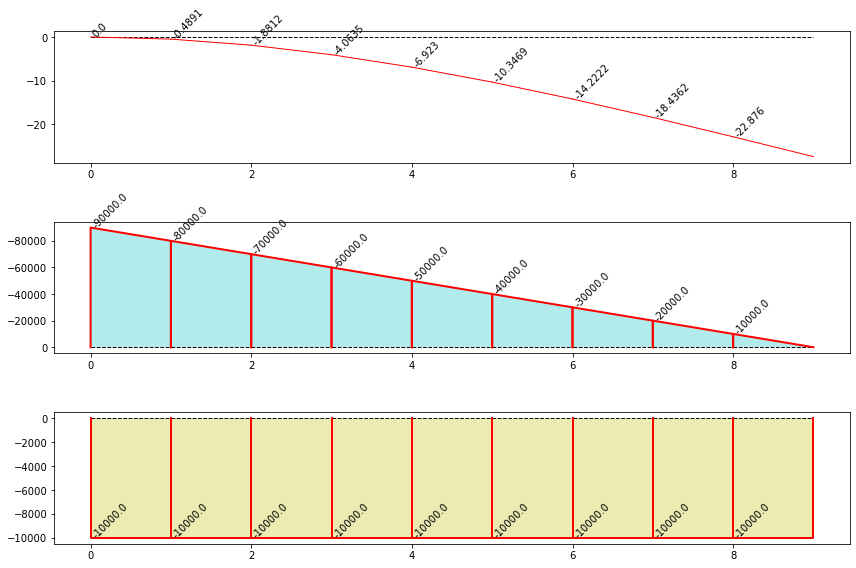

In [22]:
class Beam :
    def __init__(self, E, I, nodes, bars):
        self.E = E
        self.I = I
        self.nodes = nodes.astype(float)
        self.bars = bars.astype(int)
        
        self.dof = 2 # 1 translation et 1 rotation
        # Loads
        self.point_load = np.zeros_like(nodes)
        self.distributed_load = np.zeros([len(bars),2])
        #BCs
        self.support = np.ones_like(nodes).astype(int)
        # Geom
        self.section = np.ones(len(bars))

        self.force = np.zeros([len(bars),2 * self.dof])
        self.displacement = np.zeros([len(bars),2 * self.dof])
    
    def analyse(self):
        nn = len(self.nodes)
        ne = len(self.bars)
        n_dof = self.dof * nn
        
        d = self.nodes[self.bars[:, 1], :] - self.nodes[self.bars[:, 0], :]
        L = np.sqrt((d ** 2).sum(axis=1))
        
        #Structural matrix
        matrix = np.zeros([2 * self.dof, 2 * self.dof])
        k = np.zeros([ne, 2 * self.dof, 2 * self.dof])
        ss = np.zeros([n_dof,n_dof])

        for i in range(ne) :
            aux = self.dof * self.bars[i,:]
            index = np.r_[aux[0]:aux[0] + self.dof, aux[1]:aux[1] + self.dof]

            # Element stiffness matrix
            l = L[i]
            matrix[0] = [12, 6 * l, -12, 6 * l]
            matrix [1] = [6 * l, 4 * l **2, - 6 * l, 2 * l ** 2]
            matrix [2] = [-12, -6 * l, 12, -6 * l]
            matrix [3] = [6 * l, 2 * l ** 2, - 6 * l, 4 * l **2]
            k[i] =  E * I * matrix / l ** 3

            # Global stiffness matrix
            ss[np.ix_(index,index)] += k[i]

        # Distributed load
        eq_load_ele = np.zeros([len(self.bars), 2 * self.dof])
        for i in range(ne):
            l = L[i]
            pi = self.distributed_load[i,0] # Fy_i
            pf = self.distributed_load[i,1] # Ry_j
            eq_load_ele[i,0] = l * (21 * pi + 9 * pf) / 60 #Fy_i
            eq_load_ele[i,1] = l * (l * (2 * pi + 3 * pf)) / 60 #Rz_i
            eq_load_ele[i,2] = l * (9 * pi + 21 * pf) / 60 #Fy_j
            eq_load_ele[i,3] = l * (l * ( - 2 * pi - 3 * pf)) / 60 #Rz_j

        # Point load
        for i in range(ne):
            self.point_load[self.bars[i, 0], 0] += eq_load_ele[i,0] #Fy_i
            self.point_load[self.bars[i, 0], 1] += eq_load_ele[i,1] #Rz_i
            self.point_load[self.bars[i, 1], 0] += eq_load_ele[i,2] #Fy_j
            self.point_load[self.bars[i, 1], 1] += eq_load_ele[i,3] #Rz_j

        #print("distance : \n",d,"\n Longeuur \n",L,"\n angle \n",a,"\n Raideur matrice \n",K,"\n")

        free_dof = self.support.flatten().nonzero()[0]
        kff = ss[np.ix_(free_dof,free_dof)]
        p = self.point_load.flatten()
        pf = p[free_dof]
        uf = np.linalg.solve(kff,pf)
        u = self.support.astype(float).flatten()
        u[free_dof] = uf
        u = u.reshape(nn,self.dof)
        u_ele = np.concatenate((u[self.bars[:,0]],u[self.bars[:,1]]),axis=1)
        for i in range(ne):
            self.force[i] = k[i] @ u_ele[i] - eq_load_ele[i]
            self.displacement[i] = u_ele[i]
            
    def plot(self, scale = None):
        ne = len(self.bars)
        fig, axs = plt.subplots(3)
        
        # Displacement
        for i in range(ne):
            xi, xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            yi, yj = self.nodes[self.bars[i,0],1], self.nodes[self.bars[i,1],1]
            axs[0].plot([xi,xj], [yi, yj], 'k', linestyle = '--', linewidth = 1)
        for i in range(ne):
            dxi, dxj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            dyi = self.nodes[self.bars[i,0],1] + self.displacement[i, 0] * scale
            dyj = self.nodes[self.bars[i,1],1] + self.displacement[i, 2] * scale
            axs[0].plot([dxi,dxj], [dyi, dyj], 'r', linewidth = 1)
            axs[0].text(dxi,dyi, str(round(dyi / scale, 4)),rotation = 45)

        # Bending moment 
        axs[1].invert_yaxis()
        for i in range(ne):
            xi, xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            yi, yj = self.nodes[self.bars[i,0],1], self.nodes[self.bars[i,1],1]
            axs[1].plot([xi,xj], [yi, yj], 'k', linestyle = '--', linewidth = 1)
        for i in range(ne):
            mr_xi, mr_xf = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            mr_yi = - self.force[i, 1]
            mr_yf = self.force[i, 3]
            axs[1].plot([mr_xi, mr_xi, mr_xf, mr_xf], [0, mr_yi, mr_yf, 0], 'r', linewidth = 2)
            axs[1].fill([mr_xi, mr_xi, mr_xf, mr_xf], [0, mr_yi, mr_yf, 0], 'c', alpha = 0.3)
            axs[1].text(mr_xi,mr_yi, str(round(mr_yi, 4)),rotation = 45)
            
        # Bending moment 
        for i in range(ne):
            xi, xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            yi, yj = self.nodes[self.bars[i,0],1], self.nodes[self.bars[i,1],1]
            axs[2].plot([xi,xj], [yi, yj], 'k', linestyle = '--', linewidth = 1)
        for i in range(ne):
            fr_xi, fr_xf = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            fr_yi = - self.force[i, 0]
            fr_yf = self.force[i, 2]
            axs[2].plot([fr_xi, fr_xi, fr_xf, fr_xf], [0, fr_yi, fr_yf, 0], 'r', linewidth = 2)
            axs[2].fill([fr_xi, fr_xi, fr_xf, fr_xf], [0, fr_yi, fr_yf, 0], 'y', alpha = 0.3)
            axs[2].text(fr_xi,fr_yi, str(round(fr_yi, 4)),rotation = 45)
        
        plt.tight_layout()


nodes = [[i,0] for i in range(10)]
bars = [[i,i+1] for i in range(len(nodes)-1)]
nodes = np.array(nodes)

bars = np.array(bars)

beam_1 = Beam(E, I, nodes, bars)

point_load_1 = beam_1.point_load
point_load_1[-1,0] = -1E4

distributed_load_1 = beam_1.distributed_load
#distributed_load_1[5] = np.array([-10,-20])

support_1 = beam_1.support
support_1[0, :] = 0

beam_1.analyse()
print(point_load_1)
print(beam_1.force)
print(beam_1.force[:,::2])
print(beam_1.force[:,1::2])
print(beam_1.displacement)
print("Uy max =", np.max(np.abs(beam_1.displacement[:,0:3:2])))
print("Rz max =", np.max(np.abs(beam_1.displacement[:,1:4:2])))
beam_1.plot(scale = 1)

## Modèle de poutre à 3 ddls

In [25]:
class Frame :
    def __init__(self, E, I, nodes, bars):
        self.E = E
        self.I = I
        self.nodes = nodes.astype(float)
        self.bars = bars.astype(int)
        
        self.dof = 3 # 2 translation et 1 rotation
        # Loads
        self.point_load = np.zeros([len(nodes),3]) # Fx, Fy et Mz
        self.distributed_load = np.zeros([len(bars),2])
        #BCs
        self.support = np.ones([len(nodes),3]).astype(int) # Ux, Uy et Rz
        # Geom
        self.section = np.ones(len(bars))

        self.force = np.zeros([len(bars),2 * self.dof])
        self.displacement = np.zeros([len(bars),2 * self.dof])
        
    def K_elem(self, L_e, S):
        K_elem = self.E / L_e * np.array([[S, 0, 0, -S, 0, 0],
                                          [0, 12 * self.I / L_e ** 2, 6 * self.I / L_e, 0, -12 * self.I / L_e ** 2, 6 * self.I / L_e],
                                          [0, 6 * self.I / L_e, 4 * self.I, 0, -6 * self.I / L_e, 2 * self.I],
                                          [-S, 0, 0, S, 0, 0],
                                          [0, -12 * self.I / L_e ** 2, -6 * self.I / L_e, 0, 12 * self.I / L_e ** 2, -6 * self.I / L_e],
                                          [0, 6 * self.I / L_e, 2 * I, 0, -6 * self.I / L_e, 4 * self.I]])
        return K_elem
    
    def analyse(self):
        nn = len(self.nodes)
        ne = len(self.bars)
        n_dof = self.dof * nn
        
        d = self.nodes[self.bars[:, 1], :] - self.nodes[self.bars[:, 0], :]
        L = np.sqrt((d ** 2).sum(axis=1))
        
        #Structural matrix
        k = np.zeros([ne, 2 * self.dof, 2 * self.dof])
        ss = np.zeros([n_dof,n_dof])

        for i in range(ne) :
            aux = self.dof * self.bars[i,:]
            index = np.r_[aux[0]:aux[0] + self.dof, aux[1]:aux[1] + self.dof]

            # Element stiffness matrix
            l = L[i]
            s = self.section[i]
            k[i] =  self.K_elem(l,s)

            # Global stiffness matrix
            ss[np.ix_(index,index)] += k[i]

        # Distributed load
        eq_load_ele = np.zeros([len(self.bars), 2 * self.dof])
        for i in range(ne):
            l = L[i]
            pi = self.distributed_load[i,0] # Fy_i
            pf = self.distributed_load[i,1] # Ry_j
            eq_load_ele[i,0] = 0 #Fx_i
            eq_load_ele[i,1] = l * (21 * pi + 9 * pf) / 60 #Fy_i
            eq_load_ele[i,2] = l * (l * (2 * pi + 3 * pf)) / 60 #Rz_i
            eq_load_ele[i,3] = 0 #Fx_j
            eq_load_ele[i,4] = l * (9 * pi + 21 * pf) / 60 #Fy_j
            eq_load_ele[i,5] = l * (l * ( - 2 * pi - 3 * pf)) / 60 #Rz_j

        # Point load
        for i in range(ne):
            self.point_load[self.bars[i, 0], 1] += eq_load_ele[i,1] #Fy_i
            self.point_load[self.bars[i, 0], 2] += eq_load_ele[i,2] #Rz_i
            self.point_load[self.bars[i, 1], 1] += eq_load_ele[i,4] #Fy_j
            self.point_load[self.bars[i, 1], 2] += eq_load_ele[i,5] #Rz_j

        #print("distance : \n",d,"\n Longeuur \n",L,"\n angle \n",a,"\n Raideur matrice \n",K,"\n")

        free_dof = self.support.flatten().nonzero()[0]
        kff = ss[np.ix_(free_dof,free_dof)]
        p = self.point_load.flatten()
        pf = p[free_dof]
        uf = np.linalg.solve(kff,pf)
        u = self.support.astype(float).flatten()
        u[free_dof] = uf
        u = u.reshape(nn,self.dof)
        u_ele = np.concatenate((u[self.bars[:,0]],u[self.bars[:,1]]),axis=1)
        f_ele = np.concatenate((self.point_load[self.bars[:,0]],self.point_load[self.bars[:,1]]),axis=1)
        for i in range(ne):
            self.force[i] = k[i] @ u_ele[i] - eq_load_ele[i]
            self.displacement[i] = u_ele[i]
            
    def plot(self, scale = None):
        ne = len(self.bars)
        fig, axs = plt.subplots(4)
        
        # Displacement
        for i in range(ne):
            xi, xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            yi, yj = self.nodes[self.bars[i,0],1], self.nodes[self.bars[i,1],1]
            axs[0].plot([xi,xj], [yi, yj], 'k', linestyle = '--', linewidth = 1)
        for i in range(ne):
            dxi, dxj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            dyi = self.nodes[self.bars[i,0],1] + self.displacement[i, 1] * scale
            dyj = self.nodes[self.bars[i,1],1] + self.displacement[i, 4] * scale
            axs[0].plot([dxi,dxj], [dyi, dyj], 'r', linewidth = 1)
            axs[0].text(dxi,dyi, str(round(dyi / scale, 4)),rotation = 45)

        # Bending moment 
        axs[1].invert_yaxis()
        for i in range(ne):
            xi, xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            yi, yj = self.nodes[self.bars[i,0],1], self.nodes[self.bars[i,1],1]
            axs[1].plot([xi,xj], [yi, yj], 'k', linestyle = '--', linewidth = 1)
        for i in range(ne):
            mr_xi, mr_xf = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            mr_yi = - self.force[i, 2]
            mr_yf = self.force[i, 5]
            axs[1].plot([mr_xi, mr_xi, mr_xf, mr_xf], [0, mr_yi, mr_yf, 0], 'r', linewidth = 2)
            axs[1].fill([mr_xi, mr_xi, mr_xf, mr_xf], [0, mr_yi, mr_yf, 0], 'c', alpha = 0.3)
            axs[1].text(mr_xi,mr_yi, str(round(mr_yi, 4)),rotation = 45)
            
        # Shear Force
        for i in range(ne):
            xi, xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            yi, yj = self.nodes[self.bars[i,0],1], self.nodes[self.bars[i,1],1]
            axs[2].plot([xi,xj], [yi, yj], 'k', linestyle = '--', linewidth = 1)
        for i in range(ne):
            fr_xi, fr_xf = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            fr_yi = - self.force[i, 1]
            fr_yf = self.force[i, 4]
            axs[2].plot([fr_xi, fr_xi, fr_xf, fr_xf], [0, fr_yi, fr_yf, 0], 'r', linewidth = 2)
            axs[2].fill([fr_xi, fr_xi, fr_xf, fr_xf], [0, fr_yi, fr_yf, 0], 'y', alpha = 0.3)
            axs[2].text(fr_xi,fr_yi, str(round(fr_yi, 4)),rotation = 45)
            
        # Axial Force
        for i in range(ne):
            xi, xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            yi, yj = self.nodes[self.bars[i,0],1], self.nodes[self.bars[i,1],1]
            axs[2].plot([xi,xj], [yi, yj], 'k', linestyle = '--', linewidth = 1)
        for i in range(ne):
            nr_xi, nr_xf = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            nr_yi = - self.force[i, 0]
            nr_yf = self.force[i, 3]
            axs[3].plot([nr_xi, nr_xi, nr_xf, nr_xf], [0, nr_yi, nr_yf, 0], 'r', linewidth = 2)
            axs[3].fill([nr_xi, nr_xi, nr_xf, nr_xf], [0, nr_yi, nr_yf, 0], 'm', alpha = 0.3)
            axs[3].text(nr_xi,nr_yi, str(round(nr_yi, 4)),rotation = 45)
        
        plt.tight_layout()

force : 
  [[-1.00000000e+00  1.00000000e+00  3.00000000e+00  1.00000000e+00
  -1.00000000e+00 -2.00000000e+00]
 [-1.00000000e+00  1.00000000e+00  2.00000000e+00  1.00000000e+00
  -1.00000000e+00 -1.00000000e+00]
 [-1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.00000000e+00 -7.10542736e-15]]
effort t/c : 
 [[-1.  1.]
 [-1.  1.]
 [-1.  1.]]
effort cisaillement : 
 [[ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]]
moment flexion : 
 [[ 3.00000000e+00 -2.00000000e+00]
 [ 2.00000000e+00 -1.00000000e+00]
 [ 1.00000000e+00 -7.10542736e-15]]
deplacement : 
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.76190476e-10
  -1.50499706e-05 -2.82186949e-05]
 [ 4.76190476e-10 -1.50499706e-05 -2.82186949e-05  9.52380952e-10
  -5.26748971e-05 -4.51499118e-05]
 [ 9.52380952e-10 -5.26748971e-05 -4.51499118e-05  1.42857143e-09
  -1.01587302e-04 -5.07936508e-05]]


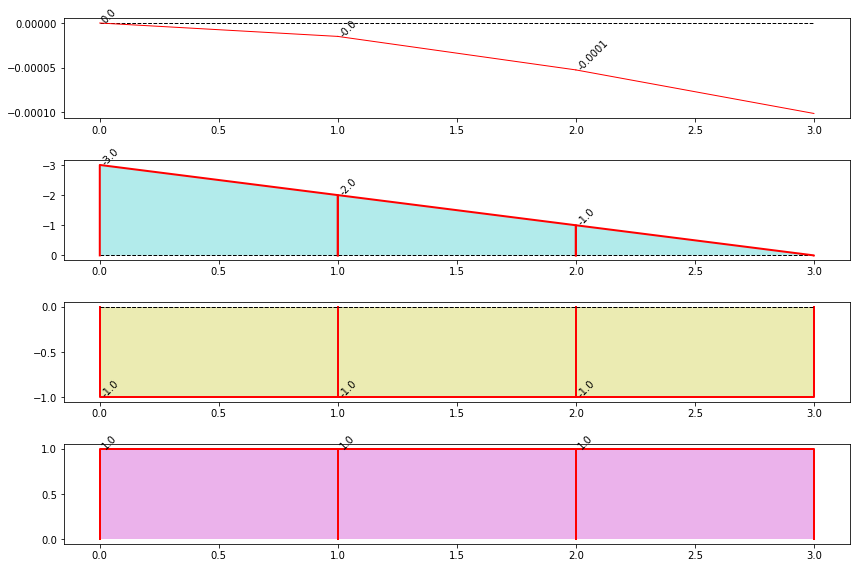

In [33]:
# Test

nodes = [[i,0] for i in range(4)]
bars = [[i,i+1] for i in range(len(nodes)-1)]
nodes = np.array(nodes)

bars = np.array(bars)

beam_1 = Frame(E, I, nodes, bars)

point_load_1 = beam_1.point_load
point_load_1[-1,0] = 1 #Fx
point_load_1[-1,1] = -1 #Fy

#distributed_load_1 = beam_1.distributed_load
#distributed_load_1[5] = np.array([-10,-20])

support_1 = beam_1.support
support_1[0, :] = 0

beam_1.analyse()
print("force : \n ", beam_1.force)
print("effort t/c : \n", beam_1.force[:,0::3])
print("effort cisaillement : \n", beam_1.force[:,1::3])
print("moment flexion : \n", beam_1.force[:,2::3])
print("deplacement : \n",beam_1.displacement)
beam_1.plot(scale = 1)

## Frame en 2D

In [83]:
class Frame_2D :
    def __init__(self, E, I, nodes, bars):
        self.E = E
        self.I = I
        self.nodes = nodes.astype(float)
        self.bars = bars.astype(int)
        
        self.dof = 3 # 2 translation et 1 rotation
        # Loads
        self.point_load = np.zeros([len(nodes),3]) # Fx, Fy et Mz
        self.distributed_load = np.zeros([len(bars),2])
        #BCs
        self.support = np.ones([len(nodes),3]).astype(int) # Ux, Uy et Rz
        # Geom
        self.section = np.ones(len(bars))

        self.force = np.zeros([len(bars),2 * self.dof])
        self.displacement = np.zeros([len(bars),2 * self.dof])
        
    def K_elem(self, L_e, S):
        K_elem = self.E / L_e * np.array([[S, 0, 0, -S, 0, 0],
                                          [0, 12 * self.I / L_e ** 2, 6 * self.I / L_e, 0, -12 * self.I / L_e ** 2, 6 * self.I / L_e],
                                          [0, 6 * self.I / L_e, 4 * self.I, 0, -6 * self.I / L_e, 2 * self.I],
                                          [-S, 0, 0, S, 0, 0],
                                          [0, -12 * self.I / L_e ** 2, -6 * self.I / L_e, 0, 12 * self.I / L_e ** 2, -6 * self.I / L_e],
                                          [0, 6 * self.I / L_e, 2 * I, 0, -6 * self.I / L_e, 4 * self.I]])
        return K_elem
    
    def Rot(self, c, s):
        """ Rotation matrix in 2D
        """
        Rotation_matrix = np.array([[c, -s, 0, 0, 0, 0],
                                    [s, c, 0, 0, 0, 0],
                                    [0, 0, 1, 0, 0, 0],
                                    [0, 0, 0, c, -s, 0],
                                    [0, 0, 0, s, c, 0],
                                    [0, 0, 0, 0, 0, 1]])
        return Rotation_matrix
    
    def plot_matrix(self, matrix):
        fig, ax = plt.subplots()
        ax.matshow(matrix, cmap = plt.cm.Blues)
        
        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                c = matrix[i,j]
                ax.text(i,j,str(c), va = 'center', ha = 'center')
        
    def analyse(self):
        nn = len(self.nodes)
        ne = len(self.bars)
        n_dof = self.dof * nn
        
        d = self.nodes[self.bars[:, 1], :] - self.nodes[self.bars[:, 0], :]
        L = np.sqrt((d ** 2).sum(axis=1))
        angle = d.T/L
        C, S = angle[0], angle[1]
        
        #Structural matrix
        k = np.zeros([ne, 2 * self.dof, 2 * self.dof])
        ss = np.zeros([n_dof,n_dof])

        for i in range(ne) :
            aux = self.dof * self.bars[i,:]
            index = np.r_[aux[0]:aux[0] + self.dof, aux[1]:aux[1] + self.dof]

            # Element stiffness matrix
            l = L[i]
            sect = self.section[i]
            c, s = C[i], S[i]
            r =  self.Rot(c, s)
            k[i] =  r.T @ self.K_elem(l,sect) @ r

            # Global stiffness matrix
            ss[np.ix_(index,index)] += k[i]
        
        # Distributed load
        eq_load_ele = np.zeros([len(self.bars), 2 * self.dof])
        for i in range(ne):
            l = L[i]
            pi = self.distributed_load[i,0] # Fy_i
            pf = self.distributed_load[i,1] # Ry_j
            eq_load_ele[i,0] = 0 #Fx_i
            eq_load_ele[i,1] = l * (21 * pi + 9 * pf) / 60 #Fy_i
            eq_load_ele[i,2] = l * (l * (2 * pi + 3 * pf)) / 60 #Rz_i
            eq_load_ele[i,3] = 0 #Fx_j
            eq_load_ele[i,4] = l * (9 * pi + 21 * pf) / 60 #Fy_j
            eq_load_ele[i,5] = l * (l * ( - 2 * pi - 3 * pf)) / 60 #Rz_j

        # Point load
        for i in range(ne):
            self.point_load[self.bars[i, 0], 1] += eq_load_ele[i,1] #Fy_i
            self.point_load[self.bars[i, 0], 2] += eq_load_ele[i,2] #Rz_i
            self.point_load[self.bars[i, 1], 1] += eq_load_ele[i,4] #Fy_j
            self.point_load[self.bars[i, 1], 2] += eq_load_ele[i,5] #Rz_j

        #print("distance : \n",d,"\n Longeuur \n",L,"\n angle \n",a,"\n Raideur matrice \n",K,"\n")

        free_dof = self.support.flatten().nonzero()[0]
        kff = ss[np.ix_(free_dof,free_dof)]
        p = self.point_load.flatten()
        pf = p[free_dof]
        uf = np.linalg.solve(kff,pf)
        u = self.support.astype(float).flatten()
        u[free_dof] = uf
        u = u.reshape(nn,self.dof)
        u_ele = np.concatenate((u[self.bars[:,0]],u[self.bars[:,1]]),axis=1)
        f_ele = np.concatenate((self.point_load[self.bars[:,0]],self.point_load[self.bars[:,1]]),axis=1)
        for i in range(ne):
            self.force[i] = k[i] @ u_ele[i] - eq_load_ele[i]
            self.displacement[i] = u_ele[i]
            
    def plot(self, scale = None):
        ne = len(self.bars)
        fig, axs = plt.subplots(4)
        
        # Displacement
        for i in range(ne):
            xi, xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            yi, yj = self.nodes[self.bars[i,0],1], self.nodes[self.bars[i,1],1]
            axs[0].plot([xi,xj], [yi, yj], 'k', linestyle = '--', linewidth = 1)
            plot_local_axis(axs[0],i)
        for i in range(ne):
            dxi, dxj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            dyi = self.nodes[self.bars[i,0],1] + self.displacement[i, 1] * scale
            dyj = self.nodes[self.bars[i,1],1] + self.displacement[i, 4] * scale
            axs[0].plot([dxi,dxj], [dyi, dyj], 'r', linewidth = 1)
            axs[0].text(dxi,dyi, str(round(dyi / scale, 4)),rotation = 45)
        axs[0].set_title('Displacement')

        # Bending moment 
        #axs[1].invert_yaxis()
        for i in range(ne):
            xi, xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            yi, yj = self.nodes[self.bars[i,0],1], self.nodes[self.bars[i,1],1]
            axs[1].plot([xi,xj], [yi, yj], 'k', linestyle = '--', linewidth = 1)
        for i in range(ne):
            xi, xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            yi, yj = self.nodes[self.bars[i,0],1], self.nodes[self.bars[i,1],1]
            mr_xi, mr_xf = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            mr_yi = - self.force[i, 2]
            mr_yf = self.force[i, 5]
            ### added by NGO
            vec_x = [(xj - xi), (yj - yi)]
            vec_y = rotate(*vec_x, 0, 0, 0, 1)
            mr_xi, mr_yi = xi + vec_y[0], yi + vec_y[1]*mr_yi
            mr_xj, mr_yj = xj + vec_y[0], yj + vec_y[1]*mr_yf
            ### end
            axs[1].plot([xi, mr_xi, mr_xf, xj], [yi, mr_yi, mr_yf, yj], 'r', linewidth = 2)
            axs[1].fill([xi, mr_xi, mr_xf, xj], [yi, mr_yi, mr_yf, yj], 'c', alpha = 0.3)
            axs[1].text(mr_xi,mr_yi, str(round(mr_yi, 4)),rotation = 45)
        axs[1].set_title('Bending Moment')
        
        # Shear Force
        for i in range(ne):
            xi, xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            yi, yj = self.nodes[self.bars[i,0],1], self.nodes[self.bars[i,1],1]
            axs[2].plot([xi,xj], [yi, yj], 'k', linestyle = '--', linewidth = 1)
        for i in range(ne):
            xi, xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            yi, yj = self.nodes[self.bars[i,0],1], self.nodes[self.bars[i,1],1]
            sr_xi, sr_xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            sr_yi = - self.force[i, 1]
            sr_yj = self.force[i, 4]
            ### added by NGO
            vec_x = [(xj - xi)/10, (yj - yi)/10]
            vec_y = rotate(*vec_x, 0, 0, 0, 1)
            sr_xi, sr_yi = xi + vec_y[0], yi + vec_y[1]*sr_yi
            sr_xj, sr_yj = xj + vec_y[0], yj + vec_y[1]*sr_yj
            ### end
            axs[2].plot([xi, sr_xi, sr_xj, xj], [yi, sr_yi, sr_yj, yj], 'r', linewidth = 2)
            axs[2].fill([xi, sr_xi, sr_xj, xj], [yi, sr_yi, sr_yj, yj], 'y', alpha = 0.3)
            axs[2].text(sr_xi,sr_yi, str(round(sr_yi, 4)),rotation = 45)
        axs[2].set_aspect('equal')
        axs[2].set_title('Shear Force')
            
        # Axial Force
        for i in range(ne):
            xi, xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            yi, yj = self.nodes[self.bars[i,0],1], self.nodes[self.bars[i,1],1]
            axs[3].plot([xi,xj], [yi, yj], 'k', linestyle = '--', linewidth = 1)
        for i in range(ne):
            xi, xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            yi, yj = self.nodes[self.bars[i,0],1], self.nodes[self.bars[i,1],1]
            nr_xi, nr_xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
            nr_yi = - self.force[i, 0]
            nr_yj = self.force[i, 3]
            ### added by NGO
            vec_x = [(xj - xi)/10, (yj - yi)/10]
            vec_y = rotate(*vec_x, 0, 0, 0, 1)
            nr_xi, nr_yi = xi + vec_y[0], yi + vec_y[1]*nr_yi
            nr_xj, nr_yj = xj + vec_y[0], yj + vec_y[1]*nr_yj
            ### end
            axs[3].plot([xi, nr_xi, nr_xj, xj], [yi, nr_yi, nr_yj, yj], 'r', linewidth = 2)
            ### added
            if self.force[i, 3] > 0: # traction
                axs[3].fill([xi, nr_xi, nr_xj, xj], [yi, nr_yi, nr_yj, yj], 'r', alpha = 0.3)
            else : # compression
                axs[3].fill([xi, nr_xi, nr_xj, xj], [yi, nr_yi, nr_yj, yj], 'b', alpha = 0.3)
            ###
            #axs[3].fill([nr_xi, nr_xi, nr_xf, nr_xf], [0, nr_yi, nr_yf, 0], 'm', alpha = 0.3)
            axs[3].text(nr_xi,nr_yi, str(round(nr_yi, 4)),rotation = 45)
        axs[3].set_aspect('equal')
        axs[3].set_title('Compression Force')
        
        plt.tight_layout()
        
    def plot_local_axis(self,ax,i):
        xi, xj = self.nodes[self.bars[i,0],0], self.nodes[self.bars[i,1],0]
        yi, yj = self.nodes[self.bars[i,0],1], self.nodes[self.bars[i,1],1]
        
        L = np.sqrt((xj-xi) ** 2 + (yj - yi) ** 2)
        c = (xj - xi) / L
        s = (yj - yi) / L
        
        mx , my = (xi + xj) / 2, (yi + yj) / 2
        
        vec_x = [xj - xi, yj - yi]
        vec_y = rotate(*vec_x, 0, 0, 0, 1) # Rotation à 90°
        
        ax.quiver(mx, my, *vec_x, color = 'b') # x axis
        ax.quiver(mx, my, *vec_y, color = 'r') # y axis


force : 
  [[-1.  4.  9.  1. -4. -5.]
 [-1.  4.  5.  1. -4. -1.]]
effort t/c : 
 [[-1.  1.]
 [-1.  1.]]
effort cisaillement : 
 [[ 4. -4.]
 [ 4. -4.]]
moment flexion : 
 [[ 9. -5.]
 [ 5. -1.]]
deplacement : 
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.76190476e-10
  -4.32686655e-05 -7.90123457e-05]
 [ 4.76190476e-10 -4.32686655e-05 -7.90123457e-05  9.52380952e-10
  -1.42974721e-04 -1.12874780e-04]]


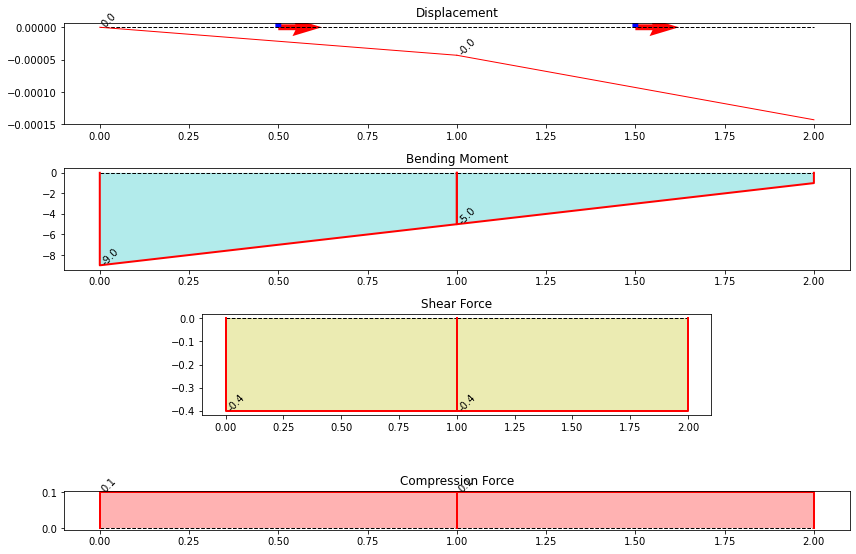

In [85]:
# Test


#nodes = [[i,0] for i in range(4)]
nodes = [[0,0], [1,0], [2,0]]
bars = [[i,i+1] for i in range(len(nodes)-1)]


nodes = np.array(nodes)
bars = np.array(bars)

beam_1 = Frame_2D(E, I, nodes, bars)

point_load_1 = beam_1.point_load
point_load_1[-1,0] = 1 #Fx
point_load_1[-1,1] = -4 #Fy
point_load_1[-1,2] = -1 #Fy

distributed_load_1 = beam_1.distributed_load
#distributed_load_1[5] = np.array([-10,-20])

support_1 = beam_1.support
support_1[0, :] = 0

beam_1.analyse()
print("force : \n ", beam_1.force)
print("effort t/c : \n", beam_1.force[:,0::3])
print("effort cisaillement : \n", beam_1.force[:,1::3])
print("moment flexion : \n", beam_1.force[:,2::3])
print("deplacement : \n",beam_1.displacement)
beam_1.plot(scale = 1)